---
>「ある人は十銭をもって一円の十分の一と解釈する。ある人は十銭をもって一銭の十倍と解釈する。同じ言葉が人によって高くも低くもなる。」 \
>（夏目漱石）
---

# 自然言語処理（Natural Language Processing）

プログラミング言語は厳格な文法により「プロセス」を与えることで、その手順通りに処理を行わせることができる

一方で、我々が用いる言語は「自然言語」と呼ばれるが、曖昧であり、意味が明確に定義されていない多様な言語である

計算機がこのような自然言語を扱うことは従来困難であったが、DNNの発展により扱うことが可能となった

## 自然言語処理の応用

- 検索エンジン
- 機械翻訳
  - DeepLはすごい
- 予測変換
  - GitHubはMicrosoftが所有しており大量の優良なコードを用いて自動実装や文法だけでなく意味チェックを行うことを目指しているいわれる
- スパムフィルタ
  - ベイズ網がよく利用されていたがNLP技術の利用が進んでいる
- 音声アシスタント
  - Alexaなど
- 小説の執筆
  - AIノベリスト(https://ai-novel.com/novel.php)
- 対話システム
  - チャットロボットなど

### AIノベリストでちょっと遊んでみた
「そこには誰もいなかった。しかし、何か咳をする音が聞こえる。」ここまで入力して、以下自動作文させてみた

```
「誰だ？」と私は叫んだ。
咳は止まらない。
私は暗闇の中に目を凝らした。
そして闇の向こうに人影を確認すると、それが誰なのかが分かった。
「父さん」
私はそう言って一歩踏み出した。
「来るな！」と父は言った。
その声には聞き覚えがあった。
「父さんだろ？ どうしてこんなところにいるんだよ」
返事はなかった。
父はただそこに立ち尽くしていた。
私の頭の中を様々な疑問や感情が入り乱れた。どうして今になって現れたのか。この部屋には父の思い出...
```

なかなかやるね！

## 機械可読辞書とコーパス

NLPにおいては、大量の「我々が普段扱う言語を電子データ化した情報」が必要となる
- NLPに限らずDNNは一般的に教師データとしての大量のデータが必要であるが、特にNLPは量が必要
- 従来はこのような情報の入手が困難であった
- 現在は、SNSやWebの情報などあらゆる言語情報が電子化されており、これらを用いたデータセットを構築できるようになった

この情報セットをコーパス(Corpus)と呼び、言語の使い方を記録・蓄積した文章集合一般のことを指す
- 特に計算機が理解できる辞書として利用できる場合、機械可読辞書(Machine-Readable Dictionary)と呼ぶ


## 形態素解析(Morphological Analysis)

コーパスがあっても直接処理するのは困難である
- そのままでは単純なデータの羅列にしかならず、無加工で解析するのは困難
- そこで、自然言語のテキストデータから、対象言語の文法や単語の品詞等の情報(辞書)に基づいて意味を持つ最小単位語句(形態素:Morpheme)に分割する
  - これを「形態素解析」と呼ぶ
  - 形態素の品詞等を判別する作業であるが、品詞を問わず分割だけ行うこともしばしば行われ、この分割作業を特に「分かち書き」と呼ぶ

例えば、「じょうしがくるまでまつ」を形態素解析するとする

もし、単純な辞書(言葉としてあり得る単語群だけで構成されている)場合、次のような分割が想定される(実際にはごく一部でありさらに大量の分類が考えられる)
- じょ うし が くる ま でま つ (序 牛が来る 間 デマ 津)
- じょ うし が くる まで まつ (序 牛が来るまで待つ)
- じょ うし が くるま で まつ (序 牛が車で待つ)
- じょ うし が くるま でま つ (序 牛が車デマ津)
- じょう し が くる まで まつ (上/穣 死が来るまで待つ)
- じょう しが くるま でま つ (上 死が車 デマ 津)
- じょうし が くる ま で ま つ (上司が来る間で間 津)
- じょうし が くる ま で まつ (上司が来る間で待つ)
- じょうし が くる ま でま つ (上司が来る間 デマ 津)
- じょうし が くる まで まつ (上司が来るまで待つ)
- じょうし が くるま で まつ (上司が車で待つ)

出来の悪い日本語変換システムの様であるが、形態素解析の難しさを説明するには十分であろう
- 機械学習で自然言語を扱う際、そのために文章を分かち書きすることすら厄介な作業であり、分かち書きのために追加で機械学習が必要というやるせなさ
- 英語は分かち書きが文法として含まれており極めて合理的に機械学習させることができる
  - 機械学習に向いている言語と向いていない言語がある
  - 日本語は向いていない、少なくとも上記の例でも英語ならば、My boss is waiting in the car.などと分かち書きされているので何も混乱なく解析できる

日本語の授業で自然言語処理を扱うのは、本当にエグイ


### MeCabを使ってみよう
MeCabライブラリを利用して分かち書きしてみよう
- MeCabのすごさはすぐにわかるので、まずはインストールして試してみよう

In [ ]:
!apt install libmecab-dev mecab mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


mecabインストール時に、/usr/local/etc/mecabrcではなく/etc/mecabrcに配置され、 \

error message: [ifs] no such file or directory: /usr/local/etc/mecabrc \

というエラーになるが、これを回避するため、シンボリックリンクを貼る

In [ ]:
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


コマンドライン実行可能なのMeCabも入るので実際に試してみよう
- 日本語の形態素解析エンジンの中では最もよく使用されている
- これがMeCabである、いろいろ試してみるとよい

In [ ]:
!echo すもももももももものうち | mecab

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS


## 構文解析（係り受け解析）

形態素解析の結果からわかるように、「これはあり得ない」「この可能性は極めて少ない」という分類がある

これらをどのように省くか、その手法をいくつか挙げる

まず構文解析
- 係り受け解析とも呼ばれる
- 形態素解析で得られた単語間の関係性を解析する
- 各品詞を辞書から得て、その品詞の並びが自然かどうかを見る

「じょ うし が くる ま でま つ (序 牛が来る 間 デマ 津)」は、(人名?)(一般名詞)(助詞)(動詞-連体形)(名詞)(名詞)(名詞)と最後が名詞の連続になり不自然というのがわかる

## 分散表現
単語そのものを数値(ベクトル)として表現する手法で、単に番号を与えるだけでなく、単語間の関連性や類似度をベクトルの中に表現している
- 一般に200要素程度のベクトルとして表現される
- 具体例としてword2vecなどがある
- 後述するが、ベクトルの足し算や引き算などで、関連する単語を導くことができる
  - 例: 王 - 男 + 女 = 女王

# word2vec

## word2vecとは？

単語のEmbeddingは重要だが、ランダムなIDを与えるのはまずいのではないか？
- そのように感じるのはもっともである
- では意味が近い言葉に近いIDを与えることなどできるのだろうか？

word2vecはそれを可能とする、初歩的な一つの方法である

## どのようなモデルなのか？

word2vecはSkip-Gramと呼ばれるNNモデルを利用する
- Skip-Gram は２層のニューラルネットワークであり隠れ層は一つのみ
- 隣接する層のユニットは全結合している

Skip-Gram のアーキテクチャは図に示す通り
- ニューラルネットワークはあるタスクで学習させる
  - 例えば入力となる言葉に対して近い場所にある言葉を教師データとして与え、相関を学習させる
- 実際には学習したタスクに対してニューラルネットワークを使わない
- 目的は潜在空間表現を使うことにある
  - 潜在空間ベクトルを単語ベクトル(図の$W_{V\times N}$)と呼び、これを単語のIDとすることを目的とする


<img src="http://class.west.sd.keio.ac.jp/dataai/text/w2v1.png" width=400>

### Skip-Gram が行うタスク

Skip-gramでは、ある単語を入力した時、その周辺にどのような単語が現れやすいかを予測するモデルを構築する
- 学習は教師あり学習で行い、入力としてある単語を、出力としてその周辺語を与える
  - これらの単語は訓練データ内に現れる単語
- これらの単語を与え、ネットワークにある単語に対するその周辺語の確率を学習させる

例えば、"I want to eat an apple everyday."という文章があった場合、eatに注目した場合の周辺単語は、周辺語として何単語まで考えるのかという指標であるウィンドウサイズ$C$を定めると次の単語が該当する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/w2v2.png" width=400>

周辺語の数を1つとした時の入出力のイメージは次の通り

<img src="http://class.west.sd.keio.ac.jp/dataai/text/w2v3.png" width=400>

このネットワークの学習が進めば、近しい場所にあった単語ほど、高い値が出力されるようになるであろう



### One-hotベクトル表現

では、さらに具体的に入力と出力にはどのように単語を与えるべきか？
- 単語はもとより可変長
- そもそも、単語を数字で表現するために行っているのに、数字にならないとNNに入力することすらできない
- その数字(ID)のとり方で学習結果に差が出ては本末転倒

まさにその通りで、これを解決するのがOne-hotベクトル表現である
- 例えばあるコーパスで単語が3種類あれば、それぞれを(1, 0, 0), (0, 1, 0), (0, 0, 1)と表現する
- あるコーパスで単語が10万種類あれば、10万要素あり1つだけ1となるベクトルを全ての単語に充てる
  - そんな非現実的なと思うかもしれないが、計算機の性能はこれを可能としてしまったのだから仕方がない


### word2vecにおけるSkip-Gramの利用

10万の単語をOne-hotベクトルで表現し入力としたとき、利用するNNの隠れ層は1つで例えばここに100個の潜在空間ベクトルを与えるとすると、10万の単語を100個の要素(数字)で表現することになる
- つまり10万個の要素が100個に縮約されたことになる
- 単語そのものを表現させるため、Skip-Gramでは隠れ層に活性化関数を設定せず、隠れ層の出力は単なる入力語の単語ベクトルになる

つまり、Skip-Gram では単語の重みベクトル同士の内積を計算していると見なすことができる
- この内積値が出力層のユニットに入力される
- 出力層ではSoftmaxを用いて正規化する
  - 確率として扱えるようにするため

<img src="http://class.west.sd.keio.ac.jp/dataai/text/w2v7.png" width=400>

word2vecでは、ある単語とその単語に対して実際に現れる周辺語の内積が大きくなるように重みを調整するよう学習させているといえる


## 実際に扱ってみよう

word2vecは膨大なデータが必要となるため、ここでは学習済みモデルを利用する
- 一般に精度の良い(実用に耐えうる)word2vecモデルはwikipediaの日本語記事の全情報を学習させている
- 医療用語など、限定的な範囲で行う場合は、専門のコーパスを用いて学習させた方が効率も精度もよくなる

学習済みモデルのダウンロードを行うが、これだけで相当時間がかかる

In [ ]:
# Google Driveは巨大ファイルの読み込みを拒否するので、これを解決するためPythonスクリプトでゴリ押しする！知識は力
import requests

def download_file_from_google_drive(id, destination):
  URL = "https://docs.google.com/uc?export=download"
  session = requests.Session()
  response = session.get(URL, params = { 'id' : id }, stream = True)
  token = get_confirm_token(response)
  if token:
    params = { 'id' : id, 'confirm' : token }
    response = session.get(URL, params = params, stream = True)
  save_response_content(response, destination)

def get_confirm_token(response):
  for key, value in response.cookies.items():
    if key.startswith('download_warning'):
      return value

  return None

def save_response_content(response, destination):
  CHUNK_SIZE = 32768
  with open(destination, "wb") as f:
    for chunk in response.iter_content(CHUNK_SIZE):
      if chunk: # filter out keep-alive new chunks
        f.write(chunk)

In [ ]:
import os
if not os.path.exists('wikipedia-jp-model.vec.gz'):
  #file_id = '1-KdCOXj-JPo8GTRDo_Pe4G7bClR4QJ8D'
  #destination = 'wikipedia-jp-model.vec.gz'
  #download_file_from_google_drive(file_id, destination)
  !wget https://keio.box.com/shared/static/jwek6ig84jtdi5vv01l3i4nsec3r1w9i -O wikipedia-jp-model.vec.gz

ファイルサイズを確認する
- `-rw-r--r-- 1 root root 208284461 MON DAY HH:MM wikipedia-jp-model.vec.gz` であれば成功している

In [ ]:
!ls -laF wikipedia-jp-model.vec.gz

-rw-r--r-- 1 root root 208284461 Aug 15 15:52 wikipedia-jp-model.vec.gz


この学習済みモデルを読み込む
- これには、さらに時間がかかることに注意する
- なお、gensim v4から仕様が変更されており、gensim v3で作成された辞書の読み込みに失敗する可能性がある

In [ ]:
import gensim

# 学習済モデルのパス
model_path = 'wikipedia-jp-model.vec.gz'
# ロードに10分くらいかかる
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

登録数を表示させる
- このあたりの仕様もgensim version2から変更となっており、不安定になる可能性がある
- model.index2wordは、新しいgensimではmodel.index_to_keyにメンバ変数が変更されているためエラーになる可能性がある

In [ ]:
# 登録している単語の数
print(len(model.index_to_key)) # 2000000

211673


単語ベクトルの要素数を見る
- 潜在空間ベクトルは1次元であるがその要素数を調べる

In [ ]:
# ひとつの単語ベクトルの次元
model['猫'].shape # (300,)

(300,)

### 類似語句

In [ ]:
from pprint import pprint
pprint(model.most_similar('猫', topn=10))

[('ネコ', 0.6948465704917908),
 ('ねこ', 0.6627997159957886),
 ('飼い主', 0.6319078803062439),
 ('子猫', 0.6110343933105469),
 ('飼っ', 0.5984471440315247),
 ('ウサギ', 0.5955032110214233),
 ('飼い', 0.5943828225135803),
 ('犬', 0.5929875373840332),
 ('野良猫', 0.5873783826828003),
 ('ロシアンブルー', 0.5760769844055176)]


### 類似度

In [ ]:
print(model.similarity('猫', '犬'))
print(model.similarity('猫', '人'))

0.59298754
0.245442


### 演算

In [ ]:
# 単語ベクトルの演算
new_vec = model['王様'] - model['男'] + model['女']

# 計算したベクトルに類似した単語
pprint(model.similar_by_vector(new_vec))

[('王様', 0.8442699313163757),
 ('眠れる', 0.49847689270973206),
 ('アンジェリカ', 0.4954322278499603),
 ('王女', 0.4931080937385559),
 ('女王', 0.4830546975135803),
 ('魔法使い', 0.4824971854686737),
 ('女', 0.46742168068885803),
 ('ラプンツェル', 0.46472883224487305),
 ('わがまま', 0.45786088705062866),
 ('Princess', 0.4573516249656677)]


```
[('王様', 0.8442699909210205),
 ('眠れる', 0.49847692251205444),
 ('アンジェリカ', 0.49543219804763794),
 ('王女', 0.4931080937385559),
 ('女王', 0.4830546975135803),
 ('魔法使い', 0.4824972152709961),
 ('女', 0.4674217104911804),
 ('ラプンツェル', 0.46472886204719543),
 ('わがまま', 0.4578608274459839),
 ('Princess', 0.4573516547679901)]
```
一応上位に欲しい単語が来ているということで

In [ ]:
model.most_similar(positive=['王様', '女'], negative=['男'])

[('アンジェリカ', 0.49048200249671936),
 ('眠れる', 0.4884800910949707),
 ('王女', 0.47573140263557434),
 ('女王', 0.4754377007484436),
 ('魔法使い', 0.46319153904914856),
 ('Princess', 0.4499151408672333),
 ('アンジェリク', 0.4491198658943176),
 ('ラプンツェル', 0.4474671483039856),
 ('Princesse', 0.44471073150634766),
 ('わがまま', 0.4431554079055786)]

```
[('アンジェリカ', 0.4904819428920746),
 ('眠れる', 0.4884800910949707),
 ('王女', 0.47573140263557434),
 ('女王', 0.4754377007484436),
 ('魔法使い', 0.46319156885147095),
 ('Princess', 0.44991517066955566),
 ('アンジェリク', 0.4491198658943176),
 ('ラプンツェル', 0.4474671483039856),
 ('Princesse', 0.44471073150634766),
 ('わがまま', 0.4431554079055786)]
 ```
結果は異なるが、こちらでも同じことができる
- こちらの方が正しいやりかた

In [ ]:
model.most_similar(positive=['姪', '男性'], negative=['女性'])

[('甥', 0.7565309405326843),
 ('従兄', 0.722212553024292),
 ('従弟', 0.7090374827384949),
 ('叔父', 0.7060896754264832),
 ('義兄', 0.7008171677589417),
 ('叔母', 0.691543698310852),
 ('伯父', 0.6811780333518982),
 ('従兄弟', 0.679537832736969),
 ('妹', 0.6782128810882568),
 ('従妹', 0.677395224571228)]

```
[('甥', 0.7565308809280396),
 ('従兄', 0.722212553024292),
 ('従弟', 0.7090373635292053),
 ('叔父', 0.7060897350311279),
 ('義兄', 0.7008171081542969),
 ('叔母', 0.6915437579154968),
 ('伯父', 0.6811779737472534),
 ('従兄弟', 0.679537832736969),
 ('妹', 0.6782128810882568),
 ('従妹', 0.677395224571228)]
```
ポピュラーな用語はうまくいきやすい

In [ ]:
model.most_similar(positive=['早稲田大学', '資本'], negative=['酒'])

[('経済学部', 0.5606974363327026),
 ('明治大学', 0.5386397838592529),
 ('中央大学', 0.5302854180335999),
 ('一橋大学', 0.5300090909004211),
 ('法政大学', 0.5128098726272583),
 ('慶應義塾', 0.5110232830047607),
 ('商学部', 0.5074078440666199),
 ('立教大学', 0.5046968460083008),
 ('武蔵大学', 0.49976056814193726),
 ('法学部', 0.4984593689441681)]

```
[('経済学部', 0.5606974363327026),
 ('明治大学', 0.5386397838592529),
 ('中央大学', 0.5302853584289551),
 ('一橋大学', 0.5300091505050659),
 ('法政大学', 0.5128098726272583),
 ('慶應義塾', 0.5110232830047607),
 ('商学部', 0.5074077248573303),
 ('立教大学', 0.504696786403656),
 ('武蔵大学', 0.49976053833961487),
 ('法学部', 0.4984593689441681)]
```
狙い通り慶應が出てくる

In [ ]:
model.most_similar(positive=['川', 'カラス'])

[('カワガラス', 0.6054568290710449),
 ('支流', 0.5978147387504578),
 ('河口', 0.5874642133712769),
 ('カワセミ', 0.5752502679824829),
 ('ソバト', 0.5706023573875427),
 ('エレシル', 0.5686533451080322),
 ('河畔', 0.5675988793373108),
 ('川下', 0.5580638647079468),
 ('イラティ', 0.5519154667854309),
 ('流域', 0.550096333026886)]

```
[('カワガラス', 0.6054568290710449),
 ('支流', 0.597814679145813),
 ('河口', 0.5874642729759216),
 ('カワセミ', 0.5752502679824829),
 ('ソバト', 0.570602297782898),
 ('エレシル', 0.5686533451080322),
 ('河畔', 0.5675989389419556),
 ('川下', 0.558063805103302),
 ('イラティ', 0.5519154667854309),
 ('流域', 0.550096333026886)]
```
カワガラスが出てくる、すばらしい

In [ ]:
model.most_similar(positive=['斑点', 'カラス'])

[('斑紋', 0.6671698093414307),
 ('ホシガラス', 0.6339893937110901),
 ('黒い', 0.628115713596344),
 ('黒く', 0.6249646544456482),
 ('白い', 0.6217935681343079),
 ('ガビチョウ', 0.6172393560409546),
 ('ヒメシジミ', 0.6087360978126526),
 ('ジャノメチョウ', 0.6007216572761536),
 ('ヒドリガモ', 0.6006507873535156),
 ('アオゲラ', 0.6004684567451477)]

```
[('斑紋', 0.6671698093414307),
 ('ホシガラス', 0.6339893937110901),
 ('黒い', 0.6281156539916992),
 ('黒く', 0.6249645948410034),
 ('白い', 0.6217936277389526),
 ('ガビチョウ', 0.6172393560409546),
 ('ヒメシジミ', 0.6087360978126526),
 ('ジャノメチョウ', 0.6007215976715088),
 ('ヒドリガモ', 0.6006507277488708),
 ('アオゲラ', 0.6004684567451477)]
 ```
その通り、斑点があるカラスがホシガラス

In [ ]:
model.most_similar(positive=['東京', 'イギリス'], negative=['日本'])

[('ロンドン', 0.5689326524734497),
 ('キングストン・アポン・テムズ', 0.5191486477851868),
 ('ブライトン', 0.5082527995109558),
 ('グラスゴー', 0.5033513903617859),
 ('バーミンガム', 0.4930422008037567),
 ('キングストン', 0.49192172288894653),
 ('リバプール', 0.4866296947002411),
 ('リヴァプール', 0.48628073930740356),
 ('サウサンプトン', 0.48453253507614136),
 ('コヴェントリー', 0.4837542772293091)]

```
[('ロンドン', 0.5689326524734497),
 ('キングストン・アポン・テムズ', 0.5191486477851868),
 ('ブライトン', 0.508252739906311),
 ('グラスゴー', 0.5033514499664307),
 ('バーミンガム', 0.4930422008037567),
 ('キングストン', 0.49192169308662415),
 ('リバプール', 0.4866297245025635),
 ('リヴァプール', 0.48628073930740356),
 ('サウサンプトン', 0.48453256487846375),
 ('コヴェントリー', 0.4837542772293091)]
```
うんうん！

In [ ]:
model.most_similar(positive=['東京', 'フランス'], negative=['日本'])

[('パリ', 0.6384394764900208),
 ('トゥールーズ', 0.5746783018112183),
 ('リヨン', 0.5595680475234985),
 ('トゥールコワン', 0.5443728566169739),
 ('マルセイユ', 0.5376759171485901),
 ('ブリュッセル', 0.5282273888587952),
 ('ストラスブール', 0.5218859314918518),
 ('ボルドー', 0.521040141582489),
 ('エーヌ', 0.5198503732681274),
 ('フレンヌ', 0.5132049322128296)]

```
[('パリ', 0.6384395360946655),
 ('トゥールーズ', 0.5746783018112183),
 ('リヨン', 0.5595680475234985),
 ('トゥールコワン', 0.5443729162216187),
 ('マルセイユ', 0.5376759767532349),
 ('ブリュッセル', 0.5282273292541504),
 ('ストラスブール', 0.5218859314918518),
 ('ボルドー', 0.5210402011871338),
 ('エーヌ', 0.5198503732681274),
 ('フレンヌ', 0.5132049322128296)]
```
ですよねー

In [ ]:
model.most_similar(positive=['年寄り'], negative=['若者'])

[('引っ込む', 0.2480604350566864),
 ('薬代', 0.2413998693227768),
 ('とおす', 0.23622910678386688),
 ('ねだる', 0.22946040332317352),
 ('こまめ', 0.2268124222755432),
 ('たまっ', 0.22511205077171326),
 ('知恵者', 0.22372165322303772),
 ('なにしろ', 0.22168254852294922),
 ('伏せっ', 0.21967369318008423),
 ('お節介', 0.21965302526950836)]

```
[('引っ込む', 0.2480604350566864),
 ('薬代', 0.24139989912509918),
 ('とおす', 0.23622915148735046),
 ('ねだる', 0.22946041822433472),
 ('こまめ', 0.2268124222755432),
 ('たまっ', 0.22511205077171326),
 ('知恵者', 0.22372162342071533),
 ('なにしろ', 0.22168254852294922),
 ('伏せっ', 0.21967372298240662),
 ('お節介', 0.21965301036834717)]
 ```
身につまされるものがある

In [ ]:
model.most_similar(positive=['金持ち'], negative=['財産'])

[('今時', 0.3461727499961853),
 ('ドジ', 0.33415570855140686),
 ('つまんない', 0.32548433542251587),
 ('気取っ', 0.3221811354160309),
 ('安物', 0.3214784264564514),
 ('からかわ', 0.31971123814582825),
 ('大嫌い', 0.3196238875389099),
 ('ちょっと', 0.3168351650238037),
 ('みたい', 0.304302841424942),
 ('女の子', 0.30388161540031433)]

```
[('今時', 0.3461727797985077),
 ('ドジ', 0.33415573835372925),
 ('つまんない', 0.32548433542251587),
 ('気取っ', 0.3221811354160309),
 ('安物', 0.3214784562587738),
 ('からかわ', 0.31971123814582825),
 ('大嫌い', 0.3196238875389099),
 ('ちょっと', 0.3168352246284485),
 ('みたい', 0.304302841424942),
 ('女の子', 0.30388158559799194)]
```
きわどいところを攻めてくるのはさすがだ

## 意味解析

構文解析を施した文章から正しく意味内容を解釈する処理

構文解析で自然であった複数の可能性について、さらに意味的に自然かどうかを判定する

先ほどの例では、候補に入っていないが、例えば、

- 上司が車で待つ
- 城址が車で待つ

というのは、解釈上異なり、意味的に城址は車で待つことはできないとわかる。

計算機は単語の意味そのものは理解できなくとも、前後関係など、他の単語間の繋がりが自然かを踏まえて適切な選択をしなければならない


## その他の解析

### 文脈解析

複数の文に対して形態素解析と意味解析を行い、文を超えたつながりについて分析する
- じょうし が くる まで まつ (上司が来るまで待つ)
- じょうし が くるま で まつ (上司が車で待つ)

これらは、単独ではどちらが正しいかは判断できず、前後の話の流れから選択する必要がある
- 文脈は、文章中に現れる語の関係や文章の背景に隠れた知識などといった複雑な情報が必要となり、意味解析以上に困難な処理となる

### 照応解析

代名詞や指示語などといった照応詞の指示内容の推定や、ゼロ代名詞と呼ばれる省略された名詞句を補完する処理

### 談話解析

実際の会話は、他の会話を会話文に入れるなど、複数文によって構成される
- 関連した一連の文を対象にして、文のまとまり、文章の構造、意味などを解析する処理

## Embedding(埋め込み)

自然言語を計算可能な形に変換することをEmbeddingと呼ぶ
- シンプルには分かち書きした言葉それぞれにユニークな番号を振ること
- 単語や文章等をベクトル表現に変換する操作のことを指す場合が多い

Embeddingにより、
- 数量表現になりコンピュータが処理できるようになる \
機械学習アルゴリズムは、一般に文字列型を直接処理できない
  - 逆伝搬などは関数による数的表現ができなければ計算すらできない
- 変換方法次第で精度の向上が見込める \
単に計算可能な形にするだけでなく、ベクトルの表現方法を工夫することで単語や文章の特徴をベクトル表現に組み込むことができる
  - 例えば、近い意味の単語同士を近いベクトルとなるように変換するなど


## 実は自然言語処理は簡単、英語などの言語ならね

日本語はともかく、英語などでは古くから自然言語処理が研究されてきた

DNNによる自然言語解析ができるようになったため、単純なEmbeddingでも、DNNの方でうまく関連をつけてくれるようになり、高い精度を要求しないのであれば、複雑な形態素解析を行う必要がない

ただ、英語ではつまらないので、とにかくこの授業は「日本語解析」にこだわる
- 精度が悪かろうが、時間が掛かろうが、こだわる
- なぜって？機械学習を学ぶことは、結局データをどのように理解し、どのようにDNNに食べさせるかの方が重要だから、それを学びたいから

# 記事の分類

自然言語処理(Natural Language Processing:NLP)の基本として記事分類を扱う

初歩的な手法として既に学んだLSTMを用いる
- 以前はLSTMなどRNNベースの学習がよく利用された
- 文章構造は近くではなく離れた情報との関連が重要で、文法構造は周期的情報に近いと考えられるため

ここでは、機械学習そのものよりもデータ処理、真にデータサイエンスについて理解を深めるという観点で学ぶこと

## データセットの準備

まずデータセットを準備する
- 今回用いるのは、日本語による自然言語処理でよく利用されるデータセットである「livedoorニュースコーパス」を用いて、ニュース記事のタイトルから、そのニュースの分類を行うことを考える \
- オリジナルはhttps://www.rondhuit.com/download.html
にあるldcc-20140209.tar.gzを利用する

各行の動作をしっかりと追いかけて理解するとよい
- カテゴリ名をディレクトリから取得
- そこからさらにカテゴリ内のファイルを取得

一例を見てみると次のようなファイル内容になっている

> http://news.livedoor.com/article/detail/6301422/ \
> 2012-02-22T10:00:00+0900 \
> 驚くほど長寿命な無線式！3年半も電池交換が不要なマウス
無線式マウスは、ケーブルがなくて使いやすい反面、電池の持ちが気になる人もいるだろう。そうした人に打ってつけのマウスがエレコムから登場する。 \
> 2月下旬より発売されるIR LEDマウス「M-IR03DRシリーズ」は、赤外線LEDを使用することで消費電力を小さくし、電池使用期間「約3.5年間」を実現したワイヤレス省電力マウスだ。長文などを一気に閲覧できる「高速スクロール」機能を搭載した。
> ボディカラーは、レッドとシルバー、ブラックの3色。

このデータセットに含まれる記事のカテゴリは、次の通りであるが、よく利用される（本当によく見る）ニュース記事分類データとしてどうなのか？とも思うところがある(それでもよく利用される著名なデータセットである)


- peachy: Peachy (毎日をハッピーに生きる女性のためのニュースサイト)
- it-life-hack: ITライフハック
- MOVIE ENTER: movie-enter
- topic-news:トピックニュース
- sports-watch: Sports Watch
- livedoor-homme: livedoor HOMME　(男性向けライフスタイルWebマガジン)
- kaden-channel: 家電チャンネル
- dokujo-tsushin: 独女通信（独身女性向けのコラム）

In [ ]:
cuda = "cuda:0"
import os
if not os.path.exists('text/topic-news/LICENSE.txt'):
  # ファイルが暗号化されているが、これはgoogle driveによるウィルス誤検出を回避するためである。
  #!wget "https://drive.google.com/uc?export=download&id=15EvNnKB6Y6-jGpo1q6N5BZ8SqMI-xzze" -O ldcc-20140209.zip
  !wget https://keio.box.com/shared/static/agjdm4m93o5lay6k0uy9wfadqi79hwpm -O ldcc-20140209.zip
if not os.path.exists('text'):
  !unzip -q -P dataai ldcc-20140209.zip

--2023-08-15 16:05:39--  https://keio.box.com/shared/static/agjdm4m93o5lay6k0uy9wfadqi79hwpm
Resolving keio.box.com (keio.box.com)... 74.112.186.144
Connecting to keio.box.com (keio.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/agjdm4m93o5lay6k0uy9wfadqi79hwpm [following]
--2023-08-15 16:05:40--  https://keio.box.com/public/static/agjdm4m93o5lay6k0uy9wfadqi79hwpm
Reusing existing connection to keio.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://keio.app.box.com/public/static/agjdm4m93o5lay6k0uy9wfadqi79hwpm [following]
--2023-08-15 16:05:40--  https://keio.app.box.com/public/static/agjdm4m93o5lay6k0uy9wfadqi79hwpm
Resolving keio.app.box.com (keio.app.box.com)... 74.112.186.144
Connecting to keio.app.box.com (keio.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!xcnRF

データの中身を実際にフォルダを見て確認するとよい

- 各記事の1行目がURL、2行目が記事の日付、3行目にタイトルが入っているためこれを取得する
- linecacheを用いて任意の行を取得することもできるが、linecacheは全データを読み切ってメモリに保存するため今回の目的としては合致しない(しかしがら、両方試してもそれほど差がなかった) \
title = linecache.getline(text_name, 3)

In [ ]:
from glob import glob
import pandas as pd
import linecache
# カテゴリを配列で取得
categories = [name for name in os.listdir("text") if os.path.isdir("text/" + name)]
print(categories)
datasets = pd.DataFrame(columns=["title", "category"])
for cat in categories:
  path = "text/" + cat + "/*.txt"
  files = glob(path)
  for text_name in files:
    with open(text_name, encoding="utf-8") as f:
      line = f.readline()
      line = f.readline()
      title = f.readline()
    s = pd.Series([title, cat], index=datasets.columns)
    datasets = datasets.append(s, ignore_index=True)
datasets.head()

['smax', 'peachy', 'movie-enter', 'kaden-channel', 'dokujo-tsushin', 'topic-news', 'it-life-hack', 'livedoor-homme', 'sports-watch']


ストリーミング出力は最後の 5000 行に切り捨てられました。
<ipython-input-32-07c11b63e3d2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets = datasets.append(s, ignore_index=True)
<ipython-input-32-07c11b63e3d2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets = datasets.append(s, ignore_index=True)
<ipython-input-32-07c11b63e3d2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets = datasets.append(s, ignore_index=True)
<ipython-input-32-07c11b63e3d2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets = datasets.append(s, ignore_index=True)
<ipython-input-32-07c11b63e3d2>:17: FutureWarning: The frame.append method is deprecated

,title,category
0,ちっちゃカワイイ仕草がぱないの！Android向けデスクトップマスコットLiplisに「忍野...,smax
1,ソフトバンク、Sweety 003Pにおいて操作中にリセットや画面がフリーズする不具合などで...,smax
2,スマホで音楽専門番組を24時間聴き放題！「ListenRadio：ラジオ音楽番組 視聴アプリ...,smax
3,難易度の高い舌を噛みそうなオーダーもこのアプリさえあれば大丈夫！スタバ通になれる「スタバコー...,smax
4,NTTドコモ、P-01Dの通話中にまれに相手の声が聞こえない不具合などでソフトウェア更新を提...,smax


pandas.sampleでデータをシャッフルする必要があるならば、次のようにするとよいが、ここではDataLoaderでシャッフルされるため必要ない
```
datasets = datasets.sample(frac=1).reset_index(drop=True)
datasets.head()
```
- pandas.sampleのfracは全データを再度サンプリングしなおしており、デフォルトでreplace=Falseなため、重複を許していない
- reset_indexで0から始まる行番号を振りなおしている

専用の分かち書きを行うための関数の定義を行う

In [ ]:
import MeCab
import re

tagger = MeCab.Tagger("-Owakati")

def make_wakati(sentence):
  # MeCabで分かち書きを行う
  sentence = tagger.parse(sentence)
  # 半角全角英数字などは削除する
  sentence = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", sentence)
  # 記号なども削除する
  sentence = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", sentence)
  # スペース区切で形態素の配列に変換する
  wakati = sentence.split(" ")
  # 空要素を削除する
  wakati = list(filter(("").__ne__, wakati))
  return wakati

## 形態素解析(Morphological Analysis)

形態素解析は、自然言語処理分野で主に事前処理として用いられ、対象言語の文法や単語の品詞情報をもとに文章を形態素(単語が意味を持つ最小の単位)に分解する解析を意味する

- 文章を形態素解析することで文字列同士・集合同士の類似度計算が可能となる
- 文書検索分野では文字列を形態素解析し名詞のみを検索対象とするなどしている
- MeCabが優れていることはわかるが、一方で形態要素解析は完ぺきではないことも理解する
  - 一意にとれない文章が存在する  
「にわにはにわにわとりがいる」という文章を解析する場合、「庭には二羽、鶏がいる」と「庭にハニワ、二羽、鳥がいる」の二通りの分解がある。つまり、意図しない結果になる場合がある。
  - 辞書が異なると解析結果も異なる  
辞書を持っており、その辞書の内容から単語の品詞情報を取得する。辞書には単語の品詞情報が含まれているが、異なる辞書間で単語の種類や品詞情報が共通化されているわけではないため、利用する辞書によって分解が異なる。
- MeCabほど精度は高くないが、インストールが簡単なJanomeがある



### MeCabの特徴

MeCabの特徴は次の通り

1. 辞書やコーパス(テキストや発話を大規模に集めてデータベース化した言語資料)に依存しない汎用的な設計である

1. 解析モデルとしてbi-gramマルコフモデルを利用(後述)
1. 高い解析精度があり、他のChaSenやKAKASIに比べ高速
1. 辞書引きアルゴリズムおよびデータ構造に高速なTRIE構造であるDouble-Arrayを用いている
  - 再入可能なライブラリ
  - 各種スクリプト言語をバインディング(perl/ruby/python/java/C#)
1. 解探索アルゴリズムにViterbi(ビタビ)を利用
  - 観測された事象系列を結果として生じる隠された状態の最も尤もらしい並び（ビタビ経路）を探す動的計画法アルゴリズムの一種で、隠れマルコフモデルに基づく
    - 隠れた状態への最適経路は、一つ前の隠れた状態までの最短経路と無関係に決まる
  - 隠れた状態までの最短経路のコストの計算量は、各隠れた状態にいたる経路の総数の加算回数となり、計算量は隠れた状態数に比例する
1. 連接表は2次元テーブルで実装される
1. 品詞の階層は無制限多階層である
1. 制約付き解析やN-best解を与えることができる

### bi-gramマルコフモデルについて

#### まずはN-gramの概要
- 文書を文字単位の記号列と考え隣接したN個の記号毎の出現頻度(度数と呼ぶ)を集計する。隣接した1個の記号からなる記号列(つまり1文字)毎の度数をuni-gram、2個の記号をbi-gram、3個の記号ならをtri-gram,…と呼ぶ
- N-gramを利用すると文法情報を用いずに分解できるため言語に依存しない文書の分割が可能となる。さらに言語学的に意味を持たない記号列についても集計が可能となる

#### マルコフ連鎖
- 確率過程の一種であるマルコフ過程のうち、とりうる状態が離散的な過程であり、特に時間が離散的である場合をさす。未来の挙動が過去の挙動と無関係で現在の値だけで決定される（マルコフ性）系列である

#### bi-gramマルコフモデル
- あるタイミングの単語の生起確率は直前の1単語にのみ依存すると仮定したモデルで、単純マルコフ過程となる。なお、N-gramに拡張した場合あるタイミングの単語の生起確率は直前のN-1単語にのみ依存すると定義しN-1重マルコフ過程に従うことを表す
- ある単語列$W=w_1,w_2,…w_n$が与えられたとき、単語列を$W$コーパス内の単語の生起確率を$C$とすると，同時生起確率$P(W)$は以下の式で定義される．

$$P(W)=∏^n_{i=1}P(w_i|w_i−1)=∏_n^{i=1}\left (\frac{C(w_i,w_i−1)}{C(w_i−1)}\right )$$

- 例えば「私はAIが嫌い」という単語列の同時生起確率Pを表す式は、BOSを文章開始、EOSを文章の終わりを示す符号とすると以下のようになる．

$P(私はAIが嫌い)=P(私|BOS)P(は|私)P(AI|は)P(が|AI)P(嫌い|が)P(EOS|嫌い)$

  - BOSやEOSの生起確率は、文章には必ず開始と終了があるため1となる。また、各単語の生起確率はコーパス内での各単語の度数/全単語数で計算する

コスト推定はコーパスから学習し、その学習モデルとして、条件付き確率場(Conditional Random Fields:CRF)を用いる

- CRFは系列ラベリングの一手法で、系列データが与えられると対応する系列ラベルを出力することができる
- MeCabの入力の系列データは単語分割済みの文字列配列(例えば慶應)である
- MeCABの出力は品詞情報などを保持したオブジェクトの配列(例えば固有名詞)である
- ある関数の引数について、定められた条件に合致するかどうかを1か0で返す関数(普通のif構文)を組成関数と呼び、t番目の単語($x_t$)と、その対象となる一つ前の単語($y_t$)、さらにその一つ前の単語($y_{t-1}$)にのみ依存すると仮定する

#### CRFの計算式

組成関数を$\phi$、確率の総和を1にするための正規化項を$Z$とすると、  

$$P(y|x)=\frac{1}{Z(x,\alpha)}\exp(\alpha^T\phi(x,y))$$  
$$Z(x,\alpha)=\sum_y \exp(\alpha^T\phi(x,y))$$  
$$\alpha^T\phi(x,y)=\sum_{t,i}\alpha_i\phi_i(x_t,y_{t-1},y_t)$$

### ビタビアルゴリズム

例えば次のような道路の最短経路を探す場合、普通に探すと組み合わせ爆発により計算コストはあっという間に増えてしまう
- そこで川に掛けられた橋に注目し、橋までの最短距離を段階的に（川ごとに）求める

<img src="http://class.west.sd.keio.ac.jp/dataai/text/viterbi1.gif" width=400>

まず、橋から橋への最短ルートを地図から読み取りその距離を求める。例として次の図が得られる
- 第１段階はＡ川の橋a1,a2,a3を渡るときで、それぞれスタート地点から一本の道しかなく、その距離を橋の名称と一緒に赤色で記述する
- 第２段階はＢ川を渡るとき。橋b1へは３本の道があるが、その中で最短の道を太線で表記し、その距離を橋の名称と一緒に赤色で記述する。この時、3回の加算計算でよく、この操作を、b2, b3に対しても行う
- これらの処理をゴールまで行うと、ゴールから太線に沿ってスタート地点まで、分岐することなく遡ることができ、最短経路となる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/viterbi2.gif" width=500>

この場合、結果は次の図のようになる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/viterbi3.gif" width=400>


### MeCabの取り込み

定義したmake_wakatiを試してみる

In [ ]:
# テスト
test = "「データシステムの知能化とデザイン」という授業は色々な意味でやばい授業と聞いている"
print(make_wakati(test))

['データ', 'システム', 'の', '知能', '化', 'と', 'デザイン', 'という', '授業', 'は', '色々', 'な', '意味', 'で', 'やばい', '授業', 'と', '聞い', 'て', 'いる']


## 文章のデータ化

文章を言葉ではなく、データとして扱えるようにする
- 文章を形態素解析する
- 全ての単語にIDを割り振って、IDの配列にする
- 配列の長さを揃える

以上の手順を踏む

まずは、必要な関数を揃える

In [ ]:
# 単語ID辞書を作成する
word2index = {}
# パディング(padding)用の文字とIDを指定する。ここでは0(後述)
word2index.update({"<pad>":0})
for title in datasets["title"]: # タイトルを一つ取り出す
  wakati = make_wakati(title) # 取り出したタイトルを分かち書きする
  for word in wakati: # 分かち書きごとに繰り返す
    if word in word2index: continue # すでにあった単語は無視
    word2index[word] = len(word2index) # 新しい単語は番号をつけて保存
print("vocab size : ", len(word2index))

# 文章を単語IDの系列データ(つまり配列)に変換
def sentence2index(sentence):
  wakati = make_wakati(sentence)
  return [word2index[w] for w in wakati]

# カテゴリも同様に辞書を作成する(重複を無くす)
cat2index = {}
for cat in categories:
  if cat in cat2index: continue
  cat2index[cat] = len(cat2index)

# カテゴリ番号を返す
def category2index(cat):
  return [cat2index[cat]]

vocab size :  13230


一番長い(単語数の多い)に合わせてインデックスの配列を準備する
- この時、それよりも短いタイトルは全てpaddingつまり0埋めを行う
  - 0である必要は実はない
- 後ろに0を入れるなら title.append(0)とするが、LSTMでは後ろに0を入れると次の値を求めるのが不安定になる
  - 0だと学習がうまくいかない
  - 後ろを1にすることもできるが、学習が遅くなる(できなくはない)
  - そもそも後ろpaddingならばコメントのようにpad_sequenceを使って一発で終わる
- 素直に、前にパディングを入れる
  - `word2index.update({"<pad>":0})`として0を埋める

In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
device = torch.device(cuda if torch.cuda.is_available() else "cpu")

index_datasets_title_tmp = []
index_datasets_category = []

# 系列の長さの最大値を取得。この長さに他の系列の長さをあわせる
max_len = 0
# pandasのdatasetsからtitleとcategoryを順番にセットで取り出す
for title, category in zip(datasets["title"], datasets["category"]):
  index_title = sentence2index(title)
  index_category = category2index(category)
  index_datasets_title_tmp.append(index_title)
  index_datasets_category.append(index_category)
  if max_len < len(index_title):
    max_len = len(index_title)

# 系列の長さを揃えるために短い系列にパディングを追加
index_datasets_title = []
for title in index_datasets_title_tmp:
  for i in range(max_len - len(title)):
    title.insert(0, 0) # 前パディング
#    title.append(1) # 後ろパディング(学習が遅くなる)、pad_sequenceを使うべき
  index_datasets_title.append(title)

# tensorのlistである必要があるため、  index_datasets_title_tmp.append(torch.tensor(index_title))としておく
#index_datasets_title = nn.utils.rnn.pad_sequence(index_datasets_title_tmp, batch_first=True, padding_value=1)

## DataLoaderの準備

- タイトルとカテゴリーをセットにしてデータを作成
- 20%をランダムに抜きだして学習に使用しない確認用データとする

ナイーブに、分割後のデータに含まれる記事分類の比率が元の比率と異なってもよいならば、TensorDatasetを作成した後、次のようにシンプルにやればよい
```
n_samples = len(title_cat_datasets)
train_size = int(n_samples*0.8)
test_size = n_samples - train_size
train_dataset, test_dataset = torch.utils.data.random_split(title_cat_datasets, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)
```
実際にそういうコードをよく見かける

ここでは、すでに扱ったが、層化分類、つまり元のデータが持つクラス比率を守るように分類する
- PyTorchにはそのような機能が残念ながら存在しない
- scikit-learnのtrain_test_splitの機能を併用して実現する
- この関数は、indexつまり、何番目のデータであるかの配列を与えるため、`torch.utils.data.Subset`を用いてデータセットを作成する


In [ ]:
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
batch_size = 100

transformer = transforms.Compose([
    transforms.ToTensor(),
]) # これがないとiter(test_loader)などでintを参照しエラーとなる

title_data = torch.tensor(index_datasets_title)
cat_data = torch.tensor(index_datasets_category)
alldataset = torch.utils.data.TensorDataset(title_data, cat_data)
# データセットをtrainとvalidationに分割
train_indices, test_indices = train_test_split(list(range(len(title_data))), test_size=0.2, stratify=cat_data)
train_dataset = torch.utils.data.Subset(alldataset, train_indices)
test_dataset = torch.utils.data.Subset(alldataset, test_indices)
# DataLoaderを作成
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



これらのどの戻り値を使うべきかは、LSTMで解きたいタスクによる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/lstmio.png" width=600>

今回は文章(many)を１つのカテゴリに分類(one)したいので、今回もmany to oneモデルとなる

## モデルの構成

ここでは、LSTMを用いる

単語のベクトルは本来はword2vecで学習済みモデルがあればその方が良い結果となる
- word2vecの背景知識を利用する、つまり、与えられたデータセット以外のデータを利用することになるためアンフェアともいえる

ここではPyTorchのtorch.nn.Embeddingを利用する
- 単語を狙った次元で表現する
  - 例えば、5次元に「単語」という言葉を埋め込むと次のようになる
```
tensor([[-0.5962, -1.2342,  1.1888, -1.1408, -0.3594]], grad_fn=<EmbeddingBackward>)
```
- 文章の場合これが2次元配列となる
  - 例えば、5次元に「単語の羅列です」を埋め込むと「単語」「の」「羅列」「です」という4つの言葉に分解され、それぞれが5次元のコードになるため次のような系列長x埋め込み次元=4x5次元の内容となる
```
tensor([[-0.5962, -1.2342,  1.1888, -1.1408, -0.3594], # 単語
        [ 0.8564,  1.8212, -0.6291,  0.4318,  1.5869], # の
        [ 0.2528, -0.3460,  0.0923, -0.7709, -0.6723], # 羅列
        [ 1.7714,  0.0655, -0.6220, -0.3896, -0.5604]], # です
       grad_fn=<EmbeddingBackward>)
torch.Size([4]) -> torch.Size([4, 5])
```

- paddingする場合、padding文字に対してコードが埋め込まれるのは不本意
  - `padding_idx=埋め込みコードの番号`とし、コードを生成せず0とするように指定できる

- さらにミニバッチ化した場合、バッチ数x系列長x埋め込み次元になる
  - LSTMなどのRNNでbatch_first=Trueとした時の入力で要求される形と等しい

In [ ]:
class LSTMCF(nn.Module):
  def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
    super(LSTMCF, self).__init__()
    self.hidden_dim = hidden_dim
    # <pad>の単語IDが0なので、padding_idx=0とする
    self.word_embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
    # batch_first=Trueが大事！
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, tagset_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, sentence):
    embeds = self.word_embeddings(sentence)
    #embeds.size() = (batch_size × len(sentence) × embedding_dim)
    y, (lstm_out, c) = self.lstm(embeds, None)
    # lstm_out[0].size() = (1 × batch_size × hidden_dim)
    tag_space = self.fc(lstm_out[0]) # テンソルの最初の要素数が1のためlstm_outでもよい
    # さらに言えば、tag_space = self.fc(y[:, -1, :])も同じ
    # tag_space.size() = (1 × batch_size × tagset_size)

    # (batch_size × tagset_size)にするためにsqueeze()する
    tag_scores = self.softmax(tag_space.squeeze())
    # tag_scores.size() = (batch_size × tagset_size)

    return tag_scores

EMBEDDING_DIM = 200 # 単語の埋め込み次元数
HIDDEN_DIM = 128 # 隠れ層の次元数
VOCAB_SIZE = len(word2index) # データ全体の単号数
TAG_SIZE = len(categories) # 分類先のカテゴリ数
model = LSTMCF(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TAG_SIZE).to(device)
loss_function = nn.NLLLoss() # LogSoftmaxの場合はNLLossを利用
optimizer = optim.Adam(model.parameters(), lr=0.001) # 最適化 lrは適切に設定すること

## 学習
1分程度で終わる
- 過学習にならないように注意する

In [ ]:
losses = []
for epoch in range(30):
  all_loss = 0
  for j, (title_batch, category_batch) in enumerate (train_loader):
    batch_loss = 0
    model.zero_grad() # モデルの勾配の情報をリセット
    title_batch = title_batch.to(device)
    category_batch = category_batch.to(device)
    out = model(title_batch)
    batch_loss = loss_function(out, category_batch.squeeze())
    batch_loss.backward()
    optimizer.step()

    all_loss += batch_loss.item()
  losses.append(all_loss)
  print("epoch", epoch, "\t" , "loss", all_loss)
  if all_loss < 0.1: break
print("done.")

epoch 0 	 loss 104.45027387142181
epoch 1 	 loss 69.23600989580154
epoch 2 	 loss 47.50318801403046
epoch 3 	 loss 30.948660403490067
epoch 4 	 loss 18.636068761348724
epoch 5 	 loss 10.048401407897472
epoch 6 	 loss 5.348515961319208
epoch 7 	 loss 2.620516123250127
epoch 8 	 loss 1.494767053052783
epoch 9 	 loss 1.007934314198792
epoch 10 	 loss 0.7366567701101303
epoch 11 	 loss 0.5890402998775244
epoch 12 	 loss 0.509805697016418
epoch 13 	 loss 0.4406393358949572
epoch 14 	 loss 0.39793128217570484
epoch 15 	 loss 0.36181418516207486
epoch 16 	 loss 0.33999444590881467
epoch 17 	 loss 0.32477591058705
epoch 18 	 loss 0.31540976429823786
epoch 19 	 loss 0.2967366788070649
epoch 20 	 loss 0.28571519622346386
epoch 21 	 loss 0.275044702750165
epoch 22 	 loss 0.26592912862543017
epoch 23 	 loss 0.25948669150238857
epoch 24 	 loss 0.2535006074467674
epoch 25 	 loss 0.25047724845353514
epoch 26 	 loss 0.24664526441483758
epoch 27 	 loss 0.24549897035467438
epoch 28 	 loss 0.241637611296

## 結果

学習が素早く進むことからわかるように、問題としてはとてもシンプルである

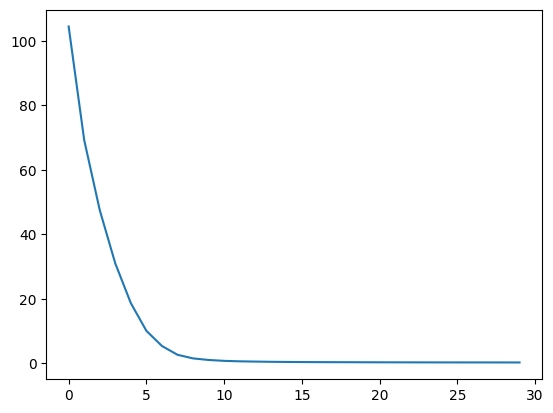

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)

### 評価用データで確認

およそ6割から7割程度の正答率となり、それほど高くない
- 一方で学習に用いたデータであれば9割以上正解しているため、過学習ともいえるが、どちらかというと単語空間と比較してデータセットが少ない問題とも取れる

- torch.maxとしているのは、結果がLogSoftmaxで生成しており、記事が9種類であるため要素数は9となる
  - LogSoftmaxはSoftmaxのように0から1の値をとらないが、いずれにしても一番大きな値を予測結果として与える
  - 例えば次のような結果である場合、最初の要素が該当する記事が最も近しいと判断される
```
tensor([[ -0.5003,  -3.5191,  -8.0818,  -2.5900,  -8.1883,  -8.2956, -11.2307, -11.2474,  -1.2442]], grad_fn=<LogSoftmaxBackward>
```




In [ ]:
a = 0
t = 0
testiter = iter(test_loader)
with torch.no_grad():
  for (title_test, category_test) in testiter:
    title_tensor = title_test.to(device)
    category_tensor = category_test.to(device)
    out = model(title_tensor.squeeze())
    _, predicts = torch.max(out, 1)
    for j, ans in enumerate(category_tensor):
      t += 1
      if predicts[j].item() == ans.item():
        a += 1
print("predict : ", a / t, " Total : ", t)

predict :  0.6883468834688347  Total :  1476


### カテゴリ別の評価

各カテゴリごとにF値を求める

In [ ]:
import collections
# IDをカテゴリに戻す用
testiter = iter(test_loader)
# answer -> 正解ラベル、predict->LSTMの予測結果、exact->正解してたらO,間違っていたらX
predict_df = pd.DataFrame(columns=["answer", "predict", "exact"])

# 予測して結果を上のDFに格納
with torch.no_grad():
  for (title_test, category_test) in testiter:
    title_tensor = title_test.to(device)
    category_tensor = category_test.to(device)
    out = model(title_tensor.squeeze())
    _, predict = torch.max(out, 1)
    predict = predict.to('cpu')
    for num, (title, category) in enumerate(zip(title_test, category_test)):
      categ = category[0].numpy().copy().tolist()
      pred = predict[num].numpy().copy().tolist()
      exact = "O" if pred == categ else "X"
      s = pd.Series([categ, pred, exact], index=predict_df.columns)
      predict_df = predict_df.append(s, ignore_index=True)

# Fスコア格納用のDF
fscore_df = pd.DataFrame(columns=["category", "all", "precison", "recall", "fscore"])

# 分類器が答えた各カテゴリの件数
prediction_count = collections.Counter(predict_df["predict"])
print(prediction_count)
# 各カテゴリの総件数
answer_count = collections.Counter(predict_df["answer"])

def icat2index(val):
  keys = [k for k, v in cat2index.items() if v == val]
  if keys:
    return keys[0]
  return None

# Fスコア求める
for i in range(9):
  all_count = answer_count[i]
  precision = len(predict_df.query('predict == ' + str(i) + ' and exact == "O"')) / prediction_count[i]
  recall = len(predict_df.query('answer == ' + str(i) + ' and exact == "O"')) / all_count
  fscore = 2*precision*recall / (precision + recall)
  s = pd.Series([icat2index(i), all_count, round(precision, 2), round(recall, 2), round(fscore, 2)], index=fscore_df.columns)
  fscore_df = fscore_df.append(s, ignore_index=True)
print(fscore_df)

<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be rem

Counter({2: 186, 4: 184, 1: 178, 8: 176, 6: 175, 0: 170, 3: 161, 5: 139, 7: 107})
         category  all  precison  recall  fscore
0            smax  174      0.89    0.87    0.88
1          peachy  169      0.54    0.57    0.56
2     movie-enter  174      0.63    0.67    0.65
3   kaden-channel  173      0.85    0.79    0.82
4  dokujo-tsushin  174      0.63    0.67    0.65
5      topic-news  154      0.68    0.61    0.64
6    it-life-hack  174      0.69    0.69    0.69
7  livedoor-homme  103      0.59    0.61    0.60
8    sports-watch  181      0.68    0.66    0.67


<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df = predict_df.append(s, ignore_index=True)
<ipython-input-42-75cf8a7f3fe6>:20: FutureWarning: The frame.append method is deprecated and will be rem

カテゴリにより正答率にかなりバラ次があることがわかる
- smaxはよく当たるが、peachyは当たらない様子

peachyとdokujo-tsushinをどのように見分けるのか逆に気になる

# 課題1 (記事分類)

上記例では、全ての記事を分類している

この記事分類について、2つの記事の2値分類に変更しなさい

# 課題2 (Word2Vec)

Word2Vecを試して、愉快な単語の足し算、引き算を一つ導き出し、その面白さを簡単に説明しなさい

# 課題3 (文章生成モデル)

英語であるが、次のOPT-13B文章生成モデルを用いて、簡単な話を作成しなさい

なお、下記のコードは、ここまでのプログラムを実行したままでは、メモリがクラッシュするため、必ず分割して実行すること
- 別のスクリプトに下記プログラムを貼り付けて実行するとよい

```
!pip install transformers
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
# OPT-13Bモデル・トークナイザの読み込み
model = AutoModelForCausalLM.from_pretrained("facebook/opt-13b", torch_dtype=torch.float16).cuda()
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-13b", use_fast=False)
# 次のpromptを変えれば、その後に続く文章を生成することができる
# - 現在候補は5個、最大長さは40としている
prompt = "Hello, I'm am conscious and"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.cuda()
# 確率が高いTop 5を生成
generated_ids = model.generate(input_ids, do_sample=True, num_return_sequences=5, max_length=40)
generated_tokens = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
```
